<a href="https://colab.research.google.com/github/HieuQCao/Machine-Learning-with-Finance/blob/main/LSTM%20using%20Current%20Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping

from keras. models import load_model
from keras. layers import LSTM


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [ ]:
df = yf.Ticker("AAPL")
df = df.history(start="2000-01-02",end="2023-01-01")


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,0.792742,0.850379,0.768648,0.846127,535796800,0.0,0.0
2000-01-04 00:00:00-05:00,0.818254,0.836206,0.764869,0.774790,512377600,0.0,0.0
2000-01-05 00:00:00-05:00,0.784238,0.835733,0.778569,0.786128,778321600,0.0,0.0
2000-01-06 00:00:00-05:00,0.802191,0.808805,0.718098,0.718098,767972800,0.0,0.0
2000-01-07 00:00:00-05:00,0.729436,0.763452,0.721878,0.752113,460734400,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,130.026375,131.516136,128.755113,130.959961,63814900,0.0,0.0
2022-12-27 00:00:00-05:00,130.483247,130.513041,127.841400,129.142456,69007800,0.0,0.0
2022-12-28 00:00:00-05:00,128.784900,130.135617,125.010842,125.179680,85438400,0.0,0.0


In [ ]:
df=df.iloc[:, :-2]
df

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03 00:00:00-05:00,0.792742,0.850379,0.768648,0.846127,535796800
2000-01-04 00:00:00-05:00,0.818254,0.836206,0.764869,0.774790,512377600
2000-01-05 00:00:00-05:00,0.784238,0.835733,0.778569,0.786128,778321600
2000-01-06 00:00:00-05:00,0.802191,0.808805,0.718098,0.718098,767972800
2000-01-07 00:00:00-05:00,0.729436,0.763452,0.721878,0.752113,460734400
...,...,...,...,...,...
2022-12-23 00:00:00-05:00,130.026375,131.516136,128.755113,130.959961,63814900
2022-12-27 00:00:00-05:00,130.483247,130.513041,127.841400,129.142456,69007800
2022-12-28 00:00:00-05:00,128.784900,130.135617,125.010842,125.179680,85438400


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())


Dataframe Shape:  (5787, 5)
Null Value Present:  False


<Axes: xlabel='Date'>

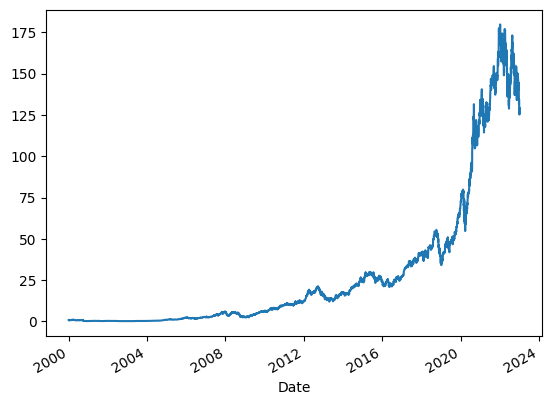

In [ ]:
df['Close'].plot()

In [ ]:
#Set Target Variable
output_var = PD.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2000-01-03 00:00:00-05:00,0.003311,0.003608,0.003262,0.067773
2000-01-04 00:00:00-05:00,0.003452,0.003529,0.003241,0.064602
2000-01-05 00:00:00-05:00,0.003263,0.003526,0.003318,0.100607
2000-01-06 00:00:00-05:00,0.003363,0.003377,0.002976,0.099206
2000-01-07 00:00:00-05:00,0.002959,0.003126,0.002997,0.057611


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

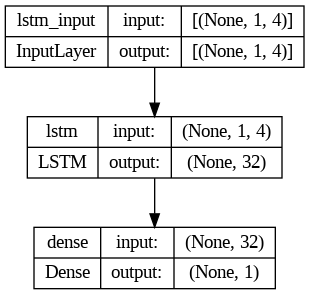

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
658/658 [==============================] - 4s 3ms/step - loss: 49.9984
Epoch 2/100
658/658 [==============================] - 2s 3ms/step - loss: 115.3302
Epoch 3/100
658/658 [==============================] - 3s 5ms/step - loss: 56.1301
Epoch 4/100
658/658 [==============================] - 2s 3ms/step - loss: 23.1288
Epoch 5/100
658/658 [==============================] - 2s 3ms/step - loss: 8.8055
Epoch 6/100
658/658 [==============================] - 2s 3ms/step - loss: 3.8303
Epoch 7/100
658/658 [==============================] - 2s 3ms/step - loss: 2.2123
Epoch 8/100
658/658 [==============================] - 2s 3ms/step - loss: 1.5111
Epoch 9/100
658/658 [==============================] - 3s 5ms/step - loss: 1.0948
Epoch 10/100
658/658 [==============================] - 2s 4ms/step - loss: 0.8145
Epoch 11/100
658/658 [==============================] - 2s 3ms/step - loss: 0.6301
Epoch 12/100
658/658 [==============================] - 2s 3ms/step - loss: 0.5206
Epoch 13

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

17/17 [==============================] - 1s 13ms/step


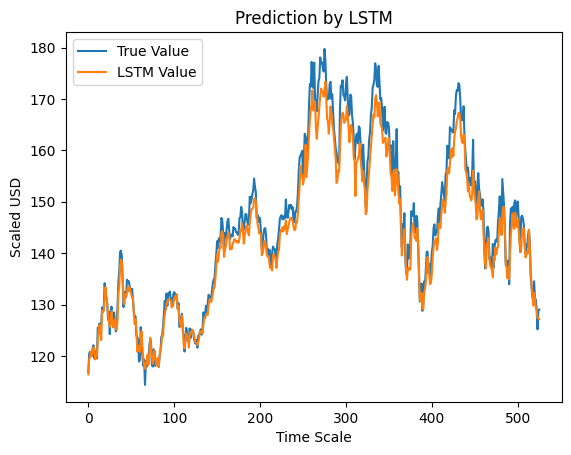

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()